<center><h1>Stroop effect : Test a Perceptual Phenomenon </h1></center>

## Introduction

Stroop effect means demonstration of interference in the reaction time of a task. This tests consist of two conditions:

- **Congruent Words Condition**

    - In this condition, participant is asked to read the color of words, where all words are color names and having same color as name. For example : <font color='red'>RED</font>  <font color='yellow'>YELLOW</font>

- **Incongruent Words Condition**

    - In this condition, participant is asked to read the color of words, where all words are color names and having different color then word name. For example : <font color='green'>BLUE</font>  <font color='red'>PINK</font>

- In both cases, the time taken to name the ink colors are measured in equally-sized lists.

## Investigation

### 1. What is our independent variable? What is our dependent variable?

- Dependent Variable : Reaction time of the participant

- Independent Variable : Color congruency to word name, means if the test is in congruent words condition or incongruent words condition.


### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

- **Hypothesis** : (at **alpha level of 0.05**)
    - H<sub>o</sub> - There is no significant difference between the reaction times noted in both conditions.$(\mu_{cong} = \mu_{incong})$
    - H<sub>a</sub> - There is a significant difference between the reaction times noted in both conditions. 
     $(\mu_{cong} \neq \mu_{incong})$
 
    Where, 
        - $\mu_{cong}$ = Population mean from which congruent words test sample is derived 
        - $\mu_{incong}$ = Population mean from which incongruent words test sample is derived
- Reason to choose this hypothesis :
 When, i took the test myself from [this link](https://faculty.washington.edu/chudler/java/ready.html), my reaction time from congruent words condition differed by 20 secs from the reaction time of incongruent words condition! Also, the results, shown at the end of test, displayed the same for most of the people who took the test. Hence, there must be a difference in central tendecies of the population. Above mentioned hypothesis does just the same. It is very useful for comparing results for their equality.

- **Test to be performed** : Two tailed dependent sample T-test.

- Reasons to choose :
Here, we going to compare results of two samples from same population in two different conditions. Also, considering presence of outliers in the data, use of t-test will ensure robustness. And T-test are well suited when sample size is small(we have sample of only 24 records). 

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [135]:
#importing libraries which will be needed for calculations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import t

In [136]:
#loading data 
df = pd.read_csv('stroopdata.csv')

#using inbuilt function to get descriptive statistics for the given data
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


- As you can see in above output, we got descriptive statstics like Mean, standard deviation etc. for the data

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde4f0e80d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fde4eef7dd0>]], dtype=object)

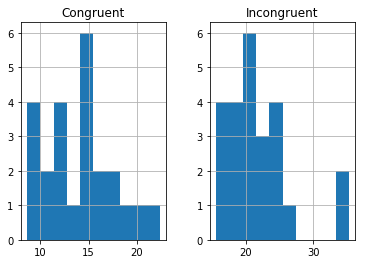

In [137]:
#plotting histogram for given data
df.hist()

- From the histogram of congruent words condition, we can clearly see that 2/3 of the participants have reaction time less than 15 secs, which is near to sample mean. In incongruent words histogram, we can see high reaction times as well as we can notice some outliers.

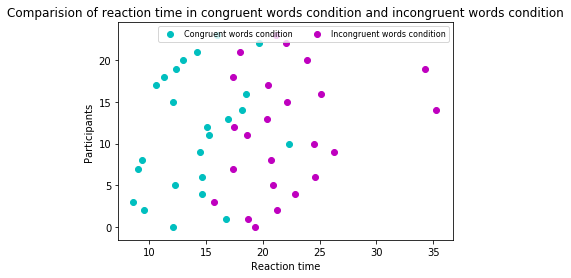

In [138]:
#plotting scatter plot comparing reaction time in both the conditions

cong = plt.scatter(df['Congruent'],range(24),marker='o', color='c')
incong = plt.scatter(df['Incongruent'],range(24),marker='o', color='m')

plt.title("Comparision of reaction time in congruent words condition and incongruent words condition")
plt.xlabel('Reaction time')
plt.ylabel('Participants')
plt.legend((cong, incong),
               ('Congruent words condition', 'Incongruent words condition'),
               scatterpoints=1,
               loc='upper right',
               ncol=2,
               fontsize=8)
plt.show()

- From the plot, it is clearly visible that, range for reaction times, in congruent words condition, is ~7 to ~17 and in incongruent words condition, it is ~17 to ~27 for most of the participant. So, It can be infered **from the graph** that, reaction times for congruent condition is significantly different from the reaction times of inconruent words condition.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

#### Calculating results for Two tailed dependent sample T-test

In [139]:
#using inbuilt functions of numpy and scipy libs to calculate results
cong = np.asarray(df['Congruent'])
incong = np.asarray(df['Incongruent'])

df = cong.shape[0] - 1
se = np.sqrt(np.std(cong, ddof=1)+np.std(cong, ddof=1))
mean_diff = np.mean(cong) - np.mean(incong)
t_critical = t.isf([0.025], [[df]])[0][0]
moe = t_critical * se
    
print ' t-critical value = %6.3f' % t_critical
print ' Mean Difference = %6.3f' % mean_diff
print ' Standar Error = %6.3f \n Degrees of Freedom = %d' % (se, df)
print ' t-statistic = %6.3f \n p_value = %f' % ttest_rel(cong, incong)
print ' 95%' + ' Confidence Interval: (%6.4f, %6.4f)' % (mean_diff - moe, mean_diff + moe)


 t-critical value =  2.069
 Mean Difference = -7.965
 Standar Error =  2.668 
 Degrees of Freedom = 23
 t-statistic = -8.021 
 p_value = 0.000000
 95% Confidence Interval: (-13.4842, -2.4454)


- Here, we got the necessary test results. 

#### Inference
- From the above results, we can clearly see that, **p_value is less than
  $\alpha$-value of 0.025 (for two tailed test)**, Hence, we **reject the null hypothesis H<sub>o</sub>**.

- Thus, it is infered that reaction time for congruent words test is significantly different from the reaction time of incongruent words test.
- This results are as per my expectation.

## References

1. https://en.wikipedia.org/wiki/Stroop_effect

2. https://matplotlib.org/api/pyplot_api.html

3. http://pandas.pydata.org/pandas-docs/stable/

4. https://stackoverflow.com/questions/tagged/numpy

5. https://stackoverflow.com/questions/tagged/pandas

6. https://stackoverflow.com/questions/tagged/matplotlib

7. https://stackoverflow.com/questions/tagged/ipython

8. https://docs.scipy.org/doc/

9. http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/inference/supporting-topics/basics/using-a-confidence-interval/